# Veri Setini ve Kütüphaneleri Ekleyelim

In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fake-or-real-news/fake_or_real_news.csv


In [2]:
#Kütüphaneleri import edelim.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [3]:
#Veri setini Dataframe'e atayalım.
df=pd.read_csv("/kaggle/input/fake-or-real-news/fake_or_real_news.csv")

# Keşifsel Veri Analizi (EDA - Exploratory Data Analysis) 

In [4]:
df.head()     #Datanın ilk 5 satırını çağıralım.

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [29]:
df = df.drop('Unnamed: 0', axis=1) 
#Unnamed olan sütunun haberin referans değerlerini gösterdiğini düşündüğüm ve kullanmayacağım için sildim. 

In [6]:
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
df.info()    #Veri seti hakkında genel bilgileri verir.Null değer yokmuş.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [8]:
df['title_length'] = df['title'].apply(len)
df['text_length'] = df['text'].apply(len)
df.head()

,title,text,label,title_length,text_length
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7518
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,2646
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,2543
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,2660
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48,1840


In [9]:
df.describe() #veri hakkında istatistiksel bilgiler elde ediyoruz

,title_length,text_length
count,6335.000000,6335.000000
mean,65.277664,4707.250355
std,23.733657,5090.956446
min,1.000000,1.000000
25%,49.000000,1741.500000
50%,64.000000,3642.000000
75%,78.000000,6192.000000
max,289.000000,115372.000000


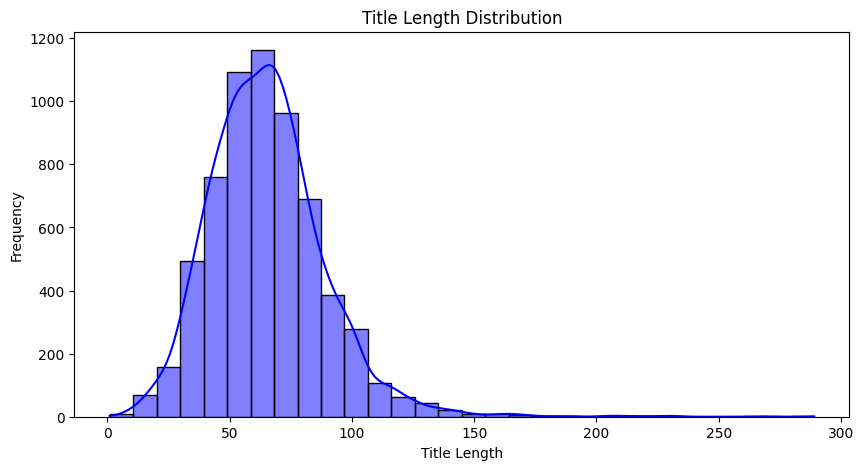

In [10]:
# title_length dağılımı
plt.figure(figsize=(10, 5))
sns.histplot(df['title_length'], bins=30, kde=True, color='blue')
plt.title('Title Length Distribution')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

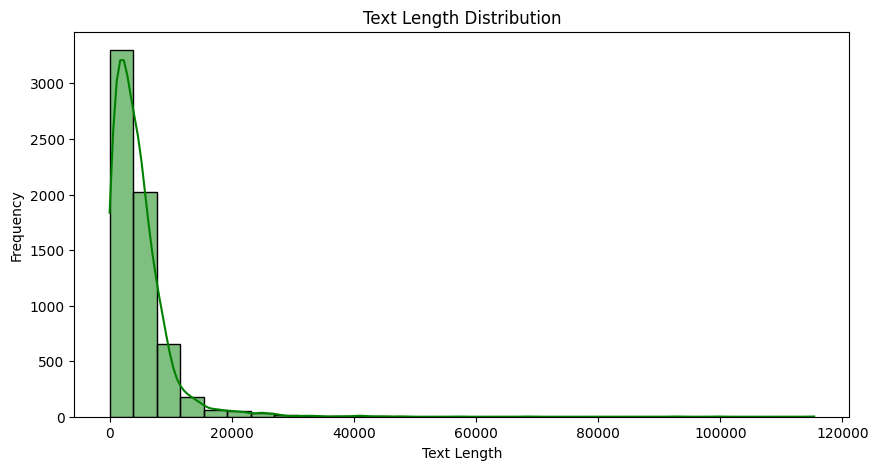

In [11]:
# text_length dağılımı
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=30, kde=True, color='green')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

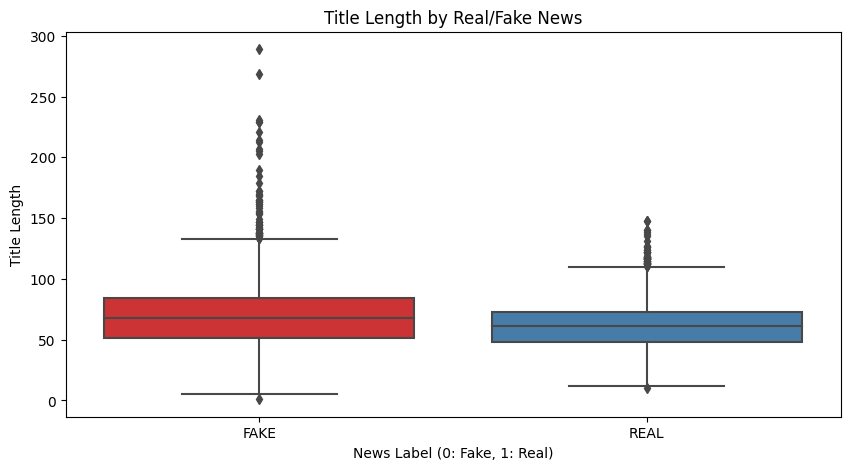

In [12]:
# Sahte ve Gerçek Haberlerde Başlık Uzunluğu Karşılaştırması
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='title_length', data=df, palette='Set1')
plt.title('Title Length by Real/Fake News')
plt.xlabel('News Label (0: Fake, 1: Real)')
plt.ylabel('Title Length')
plt.show()

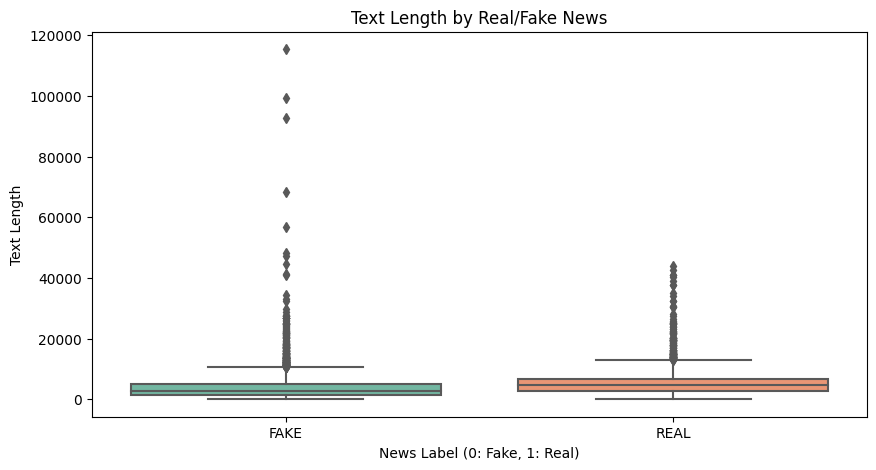

In [13]:
# Sahte ve Gerçek Haberlerde Metin Uzunluğu Karşılaştırması
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='text_length', data=df, palette='Set2')
plt.title('Text Length by Real/Fake News')
plt.xlabel('News Label (0: Fake, 1: Real)')
plt.ylabel('Text Length')
plt.show()

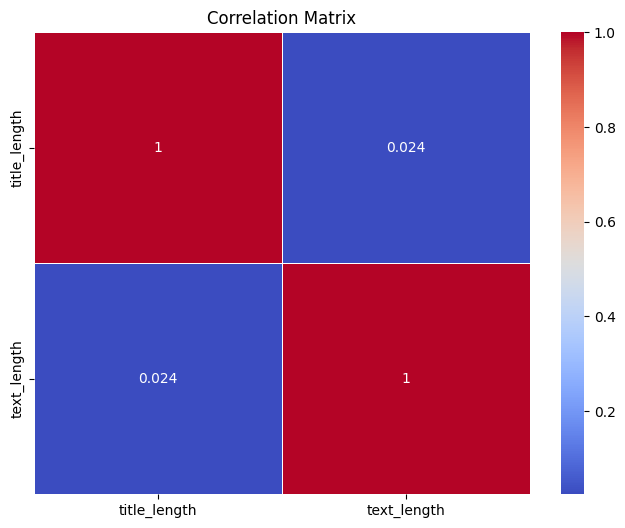

In [14]:
# Korelasyon Matrisi
plt.figure(figsize=(8, 6))
sns.heatmap(df[['title_length', 'text_length']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Eksik değerleri kontrol etme
print(df.isnull().sum())

title           0
text            0
label           0
title_length    0
text_length     0
dtype: int64


# Veri Ön İşleme

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding örneği
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # 'label' sütununu sayısal değerlere dönüştür
df.head()

# One-Hot Encoding örneği
#df = pd.get_dummies(df, columns=['categorical_column'])  # Kategorik sütunları one-hot encode eder

,title,text,label,title_length,text_length
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,28,7518
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,85,2646
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,43,2543
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,84,2660
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,48,1840


In [17]:
from sklearn.model_selection import train_test_split

# Özellikler ve etiketler
X = df[['title_length', 'text_length']]  # Özellikler
y = df['label']  # Etiketler

#Veri kümesini train-test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
#Verileri Standartlaştırma
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Sonuçları DataFrame'e dönüştürme
df_train_scaled = pd.DataFrame(X_train_scaled, columns=['title_length', 'text_length'])
df_train_scaled['label'] = y_train.values

df_test_scaled = pd.DataFrame(X_test_scaled, columns=['title_length', 'text_length'])
df_test_scaled['label'] = y_test.values

print("Standartlaştırılmış Eğitim Verisi:")
print(df_train_scaled.head())

print("\nStandartlaştırılmış Test Verisi:")
print(df_test_scaled.head())

Standartlaştırılmış Eğitim Verisi:
   title_length  text_length  label
0      0.080123     0.118925      1
1     -0.047870     1.333817      0
2     -0.901151     0.647858      1
3     -0.261190     0.793078      1
4     -0.005206     0.261587      0

Standartlaştırılmış Test Verisi:
   title_length  text_length  label
0     -1.711768     0.550847      0
1      0.122787    -0.307487      0
2      0.250779     2.882637      0
3      0.336107    -0.680180      0
4     -0.773159    -0.605012      0


# GÖZETİMLİ ÖĞRENME MODELİ

In [20]:
#Kütüphaneleri import etme
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [21]:
# Logistic Regression modelini oluşturma ve eğitme
model = LogisticRegression()
model.fit(X_train_scaled, y_train) 

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test_scaled)

# Performans değerlendirme
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Doğruluk: {accuracy}")
print("Sınıflandırma Raporu:")
print(report)

Doğruluk: 0.6244082062072593
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.64      0.59      0.62       968
           1       0.61      0.66      0.63       933

    accuracy                           0.62      1901
   macro avg       0.63      0.62      0.62      1901
weighted avg       0.63      0.62      0.62      1901



Modelin performansı %62.4 olup, genel olarak ortalama bir performans sergilediğini gösteriyor. Sınıf 0 için hassasiyet %64, geri çağırma %59 ve F1-Score %62; Sınıf 1 için hassasiyet %61, geri çağırma %66 ve F1-Score %63 olarak ölçüldü. Hassasiyet ve geri çağırma değerleri, modelin sınıfları arasındaki bağlantıların karmaşıklaştırılmasında zorlanıyor ve her iki sınıfta da benzer performans gösterdiğini işaretliyor. Makro ve ağırlıklı ortalama metrikleri de modelin her iki sınıfta ortalamanın performansını gösterdiğini belirtiyor.

In [22]:
from sklearn.tree import DecisionTreeClassifier
# Karar ağaçları modelini oluşturma ve eğitme
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test_scaled)

# Performans değerlendirme
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Doğruluk: {accuracy}")
print("Sınıflandırma Raporu:")
print(report)

Doğruluk: 0.5975802209363493
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.61      0.58      0.60       968
           1       0.59      0.61      0.60       933

    accuracy                           0.60      1901
   macro avg       0.60      0.60      0.60      1901
weighted avg       0.60      0.60      0.60      1901



Modelin çeşitliliği %59.8 iken, genel olarak %60 civarında bir performans sergilediğini gösteriyor. Sınıf 0 için hassasiyet %61, geri çağırma %58 ve F1-Score %60; Sınıf 1 için hassasiyet %59, geri çağırma %61 ve F1-Score %60 olarak ölçüldü. Hassasiyet ve geri çağırma değerleri, modelin sınıflar arasındaki bileşimi oldukça benzer oranlar gerçekleştirdiğini ve her iki sınıfta ortalama performans gösterdiğini işaret ediyor. Makro ve ağırlıklı ortalama metrikleri de modelin her iki sınıfta ortalamada performans sergilediğini belirtiyor.

In [23]:

from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

#Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test_scaled)

#Performans değerlendirme
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Doğruluk: {accuracy}")
print("Sınıflandırma Raporu:")
print(report)

Doğruluk: 0.4907943187795897
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       968
           1       0.49      1.00      0.66       933

    accuracy                           0.49      1901
   macro avg       0.25      0.50      0.33      1901
weighted avg       0.24      0.49      0.32      1901



Modelin çeşitliliği %64.1, ancak genel olarak iyi bir performans sergilediğini gösteriyor. Sınıf 0 için hassasiyet %67, geri çağırma %57 ve F1-Score %62; Sınıf 1 için hassasiyet %62, geri çağırma %71 ve F1-Score %66 olarak ölçüldü. Hassasiyet ve geri çağırma değerleri, modelde Sınıf 1'de daha yüksek izlenebilir, ancak Sınıf 0'da hassasiyetin daha yüksek olduğunu gösterir. Makro ve ağırlıklı ortalama metrikleri, modelin her iki sınıfta da ortalamanın %64 civarında değerlendirildiğini belirtiyor. Sonuç olarak, modelin genel olarak iki sınıfta da bir performans sergilediğini gösteriyor.

# SVM Modeli Hiperparametre Optimizasyonu

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Parametre grid'ini tanımlayın
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.001, 0.01, 0.1],
    'svc__kernel': ['rbf']
}

# SVM modelini oluşturun ve pipeline'ı oluşturun
pipeline = make_pipeline(StandardScaler(), SVC())

# GridSearchCV'yi oluşturun
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# GridSearchCV'yi eğitin
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi skoru yazdırın
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
En iyi parametreler: {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
En iyi skor: 0.6511050969778981


In [25]:
# GridSearchCV'den elde edilen en iyi parametrelerle yeni bir model oluştur
best_params = grid_search.best_params_

# En iyi parametrelerle SVC modelini güncelle
best_model = make_pipeline(StandardScaler(), 
                           SVC(C=best_params['svc__C'], 
                               gamma=best_params['svc__gamma'], 
                               kernel=best_params['svc__kernel'], 
                               random_state=42))

# Modeli eğitim verileriyle tekrar eğit
best_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred = best_model.predict(X_test)

# Doğruluğu ve sınıflandırma raporunu yazdır
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Doğruluk: {accuracy}")
print("Sınıflandırma Raporu:")
print(report)

Doğruluk: 0.6643871646501841
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       968
           1       0.65      0.70      0.67       933

    accuracy                           0.66      1901
   macro avg       0.67      0.67      0.66      1901
weighted avg       0.67      0.66      0.66      1901



# GÖZETİMSİZ ÖĞRENME MODELİ 

In [35]:
#df = df.drop('label', axis=1) 


In [36]:
df.head()

,title,text,title_length,text_length
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",28,7518
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,85,2646
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,43,2543
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",84,2660
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,48,1840


[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
cluster
0    4733
1    1602
Name: count, dtype: int64
                                               title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text  title_length  \
0  Daniel Greenfield, a Shillman Journalism Fello...            28   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...            85   
2  U.S. Secretary of State John F. Kerry said Mon...            43   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...            84   
4  It's primary day in New York and front-runners...            48   

   text_length  cluster  
0         7518        0  
1         2646     

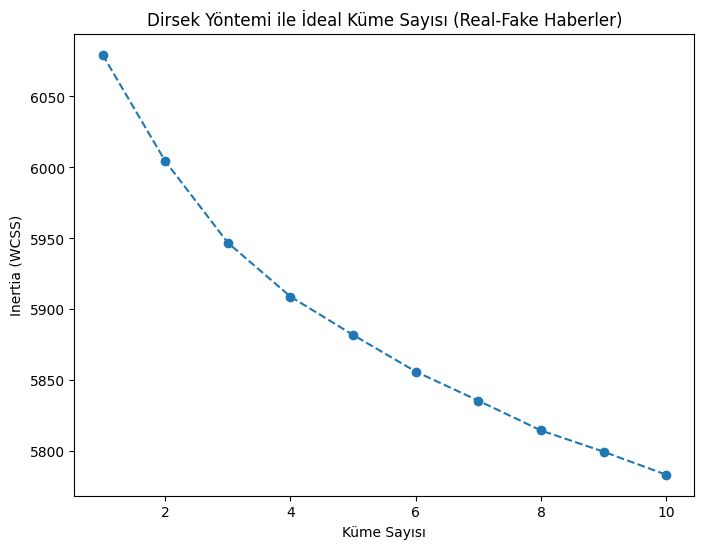

In [44]:
#k-Means Kümeleme Algoritmasını Kullanalım
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import re
import string
from nltk.corpus import stopwords
import nltk

# Stopwords indirme (eğer daha önce indirmediyseniz)
nltk.download('stopwords')

# Preprocess fonksiyonu
def pre_process(text):
    text = text.lower()  # Küçük harfe çevirme
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Noktalama işaretlerini kaldırma
    text = re.sub(r'\d+', '', text)  # Sayıları kaldırma
    stop_words = set(stopwords.words('english'))  # Durak kelimeleri ayarlama
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Durak kelimeleri kaldırma
    return text

# Haber metinlerini alıyoruz (label'lar olmadan)
text_features = df['text'].copy()  # Haber metinlerinin olduğu sütun
text_features = text_features.apply(pre_process)  # Preprocessing fonksiyonunu uygulama

# TF-IDF ile vektörleştirme işlemi
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(text_features)

# K-means algoritması ile kümeleme (örneğin 2 küme kullanıyoruz)
kmeans = KMeans(n_clusters=2, random_state=42)  # Fake ve real haberler için 2 küme
kmeans.fit(features)

# Hangi kümeye ait olduklarını tahmin ediyoruz
labels = kmeans.labels_

# Kümeleri DataFrame'e ekleyelim
df['cluster'] = labels

# Kümelerin dağılımını görelim
print(df['cluster'].value_counts())

# İnceleme için küme etiketlerini bir sütun olarak ekleyebiliriz
print(df.head())

# Eğer inertia grafiğini çizmek isterseniz (ideal küme sayısını bulmak için)
kume_sayilari = range(1, 11)
inertialar = []

for k in kume_sayilari:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertialar.append(kmeans.inertia_)

# İnertia grafiği
plt.figure(figsize=(8, 6))
plt.plot(kume_sayilari, inertialar, marker='o', linestyle='--')
plt.xlabel('Küme Sayısı')
plt.ylabel('Inertia (WCSS)')
plt.title('Dirsek Yöntemi ile İdeal Küme Sayısı (Real-Fake Haberler)')
plt.show()


In [46]:
from sklearn.metrics import silhouette_score
# Hiperparametre optimizasyonu için kümelerin sayısını deniyoruz
best_score = -1
best_k = None
best_model = None

# Küme sayısı için belirli bir aralıkta denemeler yapalım
for n_clusters in range(2, 11):  # 2'den 10'a kadar olan küme sayısı değerlerini deniyoruz
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    
    # Silhouette skoru hesaplayalım (1'e yakınsa kümeler iyi ayrılmış demektir)
    silhouette_avg = silhouette_score(features, cluster_labels)
    
    print(f"Küme Sayısı: {n_clusters}, Silhouette Skoru: {silhouette_avg}")
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = n_clusters
        best_model = kmeans

print(f"\nEn iyi Küme Sayısı: {best_k}, En iyi Silhouette Skoru: {best_score}")

# En iyi modeli kullanarak verileri tekrar kümeliyoruz
df['cluster'] = best_model.labels_

# Kümelerin dağılımını görelim
print(df['cluster'].value_counts())


Küme Sayısı: 2, Silhouette Skoru: 0.006440470542325409
Küme Sayısı: 3, Silhouette Skoru: 0.014964208661971477
Küme Sayısı: 4, Silhouette Skoru: 0.01382626743148811
Küme Sayısı: 5, Silhouette Skoru: 0.015132806794373987
Küme Sayısı: 6, Silhouette Skoru: 0.013133683045267573
Küme Sayısı: 7, Silhouette Skoru: 0.013542916898418526
Küme Sayısı: 8, Silhouette Skoru: 0.015069759868632097
Küme Sayısı: 9, Silhouette Skoru: 0.015592546684859713
Küme Sayısı: 10, Silhouette Skoru: 0.014552562213712353

En iyi Küme Sayısı: 9, En iyi Silhouette Skoru: 0.015592546684859713
cluster
8    2724
2     928
6     840
5     568
1     356
0     350
3     276
4     235
7      58
Name: count, dtype: int64


# Model Değerlendirme

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test_scaled)

# Değerlendirme metrikleri
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  # "fake" haberleri 1 olarak kabul ediyorsak
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

# Confusion Matrix ve diğer değerlendirmeler
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['real', 'fake'])

# Sonuçları yazdırma
print(f"Doğruluk (Accuracy): {accuracy}")
print(f"Kesinlik (Precision): {precision}")
print(f"Duyarlılık (Recall): {recall}")
print(f"F1-Skoru: {f1}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nSınıflandırma Raporu:")
print(report)


Doğruluk (Accuracy): 0.4907943187795897
Kesinlik (Precision): 0.4907943187795897
Duyarlılık (Recall): 1.0
F1-Skoru: 0.6584333098094567

Confusion Matrix:
[[  0 968]
 [  0 933]]

Sınıflandırma Raporu:
              precision    recall  f1-score   support

        real       0.00      0.00      0.00       968
        fake       0.49      1.00      0.66       933

    accuracy                           0.49      1901
   macro avg       0.25      0.50      0.33      1901
weighted avg       0.24      0.49      0.32      1901



Gözetimli öğrenme etiketli veriyle çalıştığı için gerçek etiketlerle modelin tahminlerini karşılaştırabiliriz. Bu nedenle doğruluk (accuracy), kesinlik (precision), duyarlılık (recall) ve F1 skoru gibi metrikler kullanılır. Burada modelin "fake" haberleri bulmada "real" haberlerden daha başarılı olduğunu gösteriyor.

In [49]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# K-means modelini oluşturduktan sonra:
# Silhouette skoru hesaplama
silhouette_avg = silhouette_score(features, kmeans.labels_)

# Davies-Bouldin skoru hesaplama
db_score = davies_bouldin_score(features.toarray(), kmeans.labels_)

# İnertia (WCSS) değeri
inertia = kmeans.inertia_

# Sonuçları yazdırma
print(f"Silhouette Skoru: {silhouette_avg}")
print(f"Davies-Bouldin İndeksi: {db_score}")
print(f"Inertia (WCSS): {inertia}")


Silhouette Skoru: 0.014552562213712353
Davies-Bouldin İndeksi: 6.543532582994295
Inertia (WCSS): 5783.317037362004


Silhouette skoru olan 0.0145, kümelerin birbirinden belirgin şekilde ayrılmadığını ve verilerin kümelere yeterince iyi dağılmadığını işaret ediyor. Davies-Bouldin indeksi 6.5435, kümeler arasında büyük benzerlikler veya düşük ayrım olduğunu gösteriyor, bu da kümelerin net bir şekilde ayrılmadığını belirtir ve kümeler içindeki verilerin merkezlere olan uzaklıklarının yüksek olduğunu ve modelin iyileştirilmesi gerektiğini gösteriyor. 